In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

plt.rc('axes', titlesize=20)
plt.rc('figure', figsize=(16, 10))

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)
cases_df = df.loc[:, ["cases", "deaths"]]
tests_df = df.loc[:, ["cases", "test_total"]]

evolution_df = df.diff()[["cases", "deaths", "test_total"]].iloc[1:]

In [3]:
smas = pd.DataFrame()
smas["cases_SMA_7"] = evolution_df["cases"].rolling(window=7).mean()
smas["cases_SMA_21"] = evolution_df["cases"].rolling(window=21).mean()

smas["deaths_SMA_7"] = evolution_df["deaths"].rolling(window=7).mean()
smas["deaths_SMA_21"] = evolution_df["deaths"].rolling(window=21).mean()

def to_pct_string(frame):
    new_frame = pd.DataFrame()
    for column in frame.columns:
        new_frame[column] = pd.Series(["{0:.2f}%".format(val * 100) for val in frame[column]], index = frame.index)
    return new_frame

# Evolution Charts

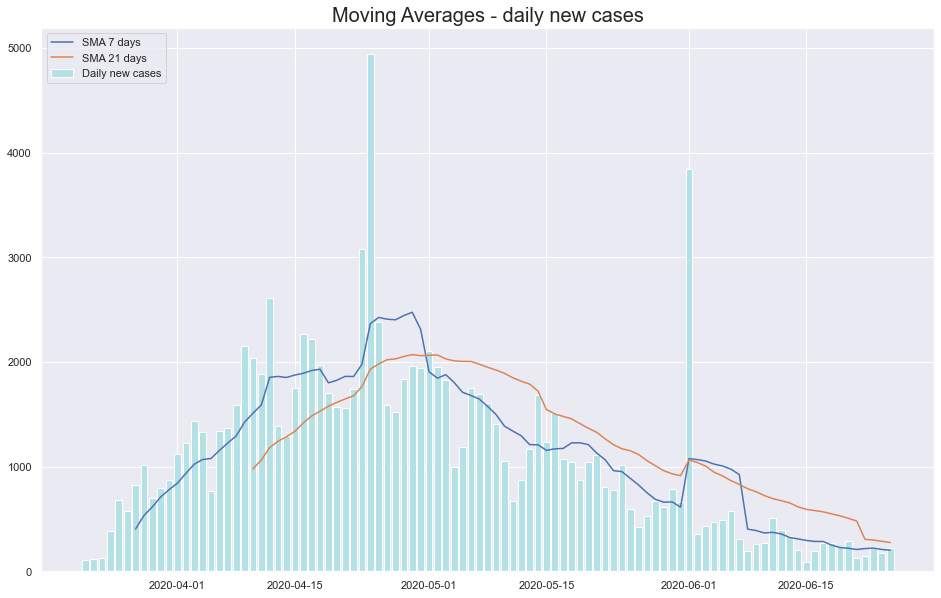

In [4]:
@interact
def show_change_chart(days=widgets.IntSlider(min=1, max=len(smas), value=len(smas)), 
                      show_cases=True, 
                      show_deaths=False,
                      show_totals=widgets.ToggleButtons(options=['All', 'None', 'Cases', 'Deaths'], value='Cases')):
    data = smas.iloc[-days:]
    evolution_local = evolution_df.iloc[-days:]
    if show_cases:
        plt.plot(data["cases_SMA_7"], label="SMA 7 days")
        plt.plot(data["cases_SMA_21"], label="SMA 21 days")
        
    if show_deaths:
        plt.plot(data["deaths_SMA_7"], label="SMA 7 days")
        plt.plot(data["deaths_SMA_21"], label="SMA 21 days")
        
    if show_totals in ['All', 'Cases']:
        plt.bar(evolution_local.index, evolution_local["cases"], label="Daily new cases", color="#b3e1e5")
        
    if show_totals in ['All', 'Deaths']:
        plt.bar(evolution_local.index, evolution_local["deaths"], label="Daily deaths", color="#facfee")
        
    plt.legend(loc=2)
    plt.title("Moving Averages - daily new cases")
    plt.show()

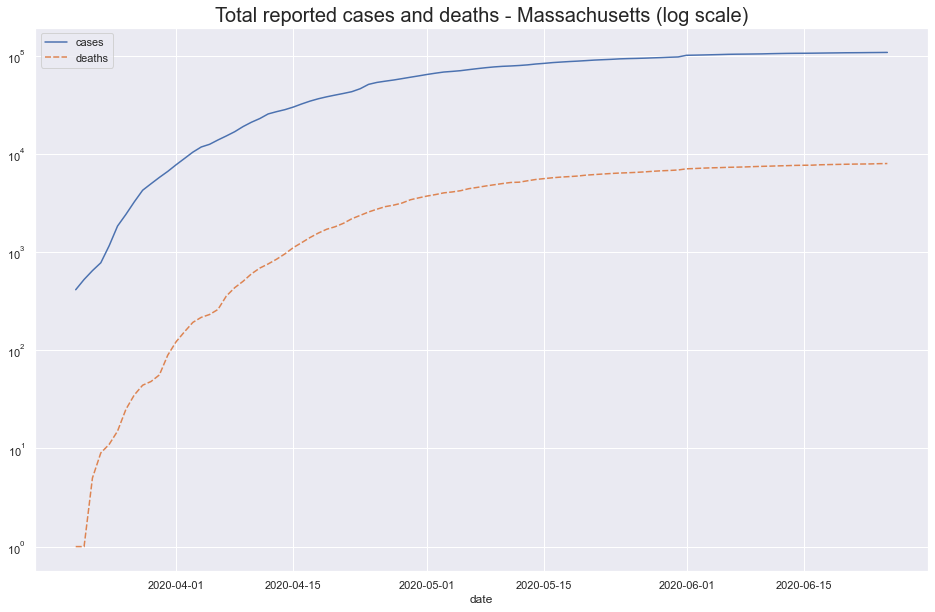

In [5]:
# plt.figure(figsize=(16, 10))

@interact
def show_cases(scale=['log', 'linear']):
    ax = sns.lineplot(data=cases_df)
    ax.set_yscale(scale)

    plt.title("Total reported cases and deaths - Massachusetts ({} scale)".format(scale))
    plt.show()

In [6]:
@interact
def show_pct_change(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return to_pct_string(smas.pct_change().iloc[-days:])

,cases_SMA_7,cases_SMA_21,deaths_SMA_7,deaths_SMA_21
date,,,,
2020-06-19,-9.34%,-3.37%,-5.76%,-4.25%
2020-06-20,-3.14%,-4.52%,-3.82%,-2.03%
2020-06-21,-5.39%,-5.07%,-7.14%,-4.53%
2020-06-22,4.25%,-36.56%,-2.99%,-17.09%
2020-06-23,2.24%,-2.01%,-0.88%,-4.05%
2020-06-24,-6.05%,-4.09%,-9.33%,-2.36%
2020-06-25,-3.08%,-4.07%,-5.39%,-3.05%


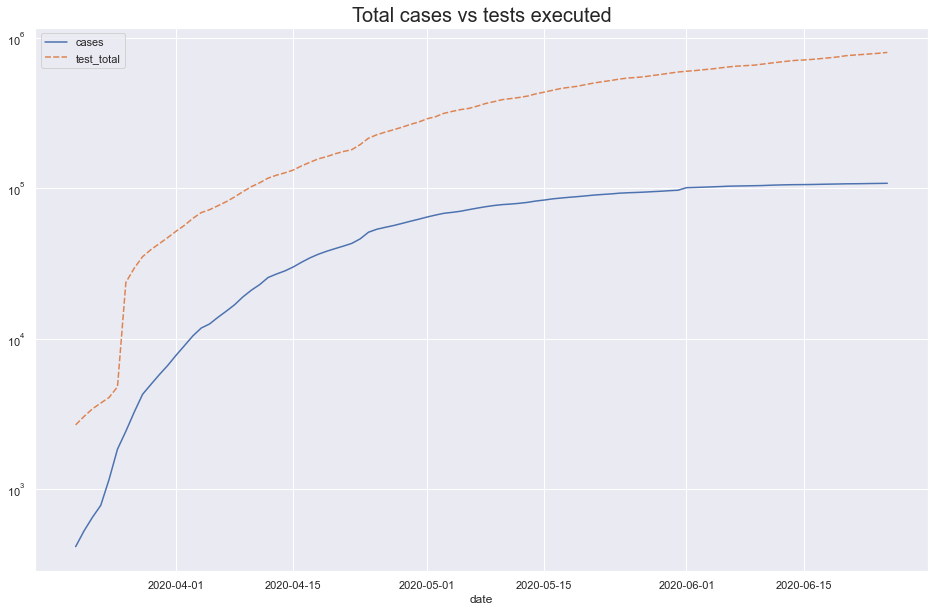

In [7]:
ax = sns.lineplot(data=tests_df)
ax.set_yscale("log")

plt.title("Total cases vs tests executed")

plt.show()

   # Data for the past week

## Daily new cases

In [8]:
@interact
def show_daily_stats(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return evolution_df.iloc[-days:]

,cases,deaths,test_total
date,,,
2020-06-19,228.0,30.0,9471.0
2020-06-20,286.0,28.0,14067.0
2020-06-21,125.0,30.0,8363.0
2020-06-22,149.0,16.0,6730.0
2020-06-23,229.0,16.0,7532.0
2020-06-24,172.0,48.0,7369.0
2020-06-25,226.0,25.0,10318.0


## Daily percent change

In [9]:
@interact
def show_daily_pct_change(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return to_pct_string(df.pct_change().iloc[-7:])

,cases,deaths,test_positive,test_total
date,,,,
2020-06-19,0.21%,0.39%,0.21%,1.29%
2020-06-20,0.27%,0.36%,0.27%,1.89%
2020-06-21,0.12%,0.38%,0.12%,1.10%
2020-06-22,0.14%,0.20%,0.14%,0.88%
2020-06-23,0.21%,0.20%,0.21%,0.97%
2020-06-24,0.16%,0.61%,0.16%,0.94%
2020-06-25,0.21%,0.31%,0.21%,1.31%
